In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [13]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage_split/train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 44361 files belonging to 39 classes.


In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage_split/val',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 11087 files belonging to 39 classes.


In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[103.5   91.5   91.5 ]
   [ 94.5   82.5   82.5 ]
   [ 93.    81.    81.  ]
   ...
   [ 88.    74.    73.  ]
   [ 99.25  85.25  84.25]
   [ 97.25  83.25  82.25]]

  [[103.    91.    91.  ]
   [107.    95.    95.  ]
   [ 93.    81.    81.  ]
   ...
   [ 90.25  76.25  75.25]
   [ 95.5   81.5   80.5 ]
   [ 97.    83.    82.  ]]

  [[108.25  96.25  96.25]
   [101.5   89.5   89.5 ]
   [115.25 103.25 103.25]
   ...
   [108.75  94.75  93.75]
   [ 97.25  83.25  82.25]
   [ 98.25  84.25  83.25]]

  ...

  [[141.   129.   129.  ]
   [142.   130.   130.  ]
   [139.   127.   127.  ]
   ...
   [143.   129.   129.  ]
   [141.75 127.75 127.75]
   [135.75 121.75 121.75]]

  [[133.25 121.25 121.25]
   [141.25 129.25 129.25]
   [138.5  126.5  126.5 ]
   ...
   [137.5  123.5  123.5 ]
   [139.5  125.5  125.5 ]
   [139.5  125.5  125.5 ]]

  [[134.25 122.25 122.25]
   [139.5  127.5  127.5 ]
   [136.75 124.75 124.75]
   ...
   [136.   122.   122.  ]
   [136.5  122.5  122.5 ]
   [141.5  127.5  12

In [7]:
from tensorflow.keras import applications, layers, Model, Input

In [8]:
base = applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=(128, 128, 3))
base.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
inputs = Input(shape=(128, 128, 3))
x = base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(39, activation="softmax")(x)

mod = Model(inputs, outputs)

# Mod complation

In [11]:
mod.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = mod.fit(training_set, validation_data=validation_set, epochs=10)
mod.summary()

Epoch 1/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 3331s 2s/step - accuracy: 0.7094 - loss: 1.1858 - val_accuracy: 0.9221 - val_loss: 0.3024
Epoch 2/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 70s 50ms/step - accuracy: 0.9150 - loss: 0.3116 - val_accuracy: 0.9375 - val_loss: 0.2209
Epoch 3/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 70s 50ms/step - accuracy: 0.9299 - loss: 0.2410 - val_accuracy: 0.9453 - val_loss: 0.1888
Epoch 4/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 69s 50ms/step - accuracy: 0.9363 - loss: 0.2056 - val_accuracy: 0.9493 - val_loss: 0.1680
Epoch 5/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 69s 50ms/step - accuracy: 0.9454 - loss: 0.1798 - val_accuracy: 0.9534 - val_loss: 0.1525
Epoch 6/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 69s 50ms/step - accuracy: 0.9474 - loss: 0.1684 - val_accuracy: 0.9545 - val_loss: 0.1458
Epoch 7/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.9478 - loss: 0.1599 - val_accuracy: 0.9550 - val_loss: 0.1412
Epoch 8/10
1387/1387 ━━━━━━━━━━━━━━━━━━━━ 69s 50ms/step - accuracy: 0.9514 -

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │        49,959 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,199,450 (16.02 MB)

 Trainable params: 49,959 (195.15 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 99,920 (390.32 KB)

# MOd eval

In [12]:
train_acc,train_loss= mod.evaluate(training_set)

1387/1387 ━━━━━━━━━━━━━━━━━━━━ 62s 45ms/step - accuracy: 0.9783 - loss: 0.0765


In [15]:
val_acc,val_loss=mod.evaluate(validation_set)

347/347 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9582 - loss: 0.1384


# Save Mod

In [16]:
mod.save('MobileNetV2.keras')

In [17]:
history.history

{'accuracy': [0.8281823992729187,
  0.917179524898529,
  0.931110680103302,
  0.9368589520454407,
  0.9444782733917236,
  0.945875883102417,
  0.9474989175796509,
  0.9509028196334839,
  0.951421320438385,
  0.9514889121055603],
 'loss': [0.6902944445610046,
  0.29461798071861267,
  0.23505745828151703,
  0.20473754405975342,
  0.1814102977514267,
  0.17163801193237305,
  0.16274482011795044,
  0.15408927202224731,
  0.1520051658153534,
  0.14339600503444672],
 'val_accuracy': [0.9220709204673767,
  0.9374943375587463,
  0.9452511668205261,
  0.9493100047111511,
  0.9533687829971313,
  0.9545413255691528,
  0.9549923539161682,
  0.9586001634597778,
  0.9587805271148682,
  0.959502100944519],
 'val_loss': [0.3024297058582306,
  0.22089146077632904,
  0.18875646591186523,
  0.16804097592830658,
  0.1525394767522812,
  0.14576423168182373,
  0.14116430282592773,
  0.13364270329475403,
  0.13235248625278473,
  0.12895765900611877]}

# recording history

In [18]:
import json
with open('history.json', 'w') as f:
    json.dump(history.history, f)

# Accuracy Vizuvaliation

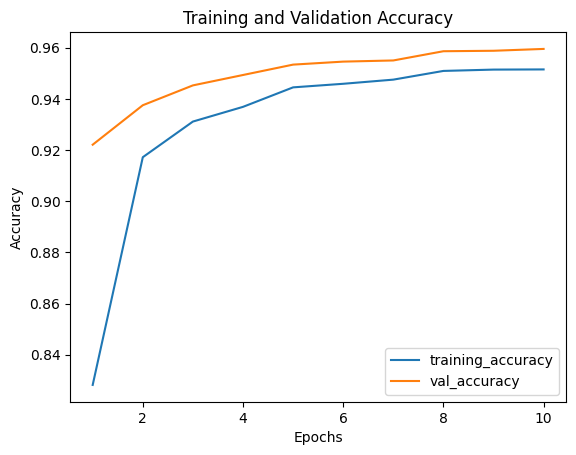

In [20]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],label='training_accuracy')
plt.plot(epochs,history.history['val_accuracy'],label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confustion Matrix for model evaluation

In [21]:
class_names=validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [22]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage_split/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 11087 files belonging to 39 classes.


In [23]:
ypred=mod.predict(test_set)
ypred.shape

347/347 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step


(11087, 39)

In [24]:
prd_cat=tf.argmax(ypred,axis=1)
prd_cat

<tf.Tensor: shape=(11087,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38])>

In [25]:
prd_cat = tf.argmax(ypred,axis=1)

In [26]:
prd_cat

<tf.Tensor: shape=(11087,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38])>

In [27]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(11087, 39), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [28]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(11087,), dtype=int64, numpy=array([ 0,  0,  0, ..., 38, 38, 38])>

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,prd_cat,target_names=class_names))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.98      0.92      0.95       126
                            Apple___Black_rot       0.98      0.98      0.98       124
                     Apple___Cedar_apple_rust       0.98      0.98      0.98        55
                              Apple___healthy       0.95      0.98      0.97       329
                    Background_without_leaves       0.99      0.97      0.98       229
                          Blueberry___healthy       0.99      0.99      0.99       300
                      Cherry___Powdery_mildew       0.99      0.98      0.98       210
                             Cherry___healthy       1.00      0.99      0.99       171
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.85      0.88       103
                           Corn___Common_rust       1.00      1.00      1.00       238
                  Corn___Northern_Leaf_Bli

In [2]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_true,predicted_categories)
cm

NameError: name 'Y_true' is not defined

# Confustion matrix viz

We only interested in the diagonal element in the confustion matrix if the the element is bight the model is predicting correcly in the each case scenorio

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# perforing the model prediction based on the random sample test images on the the trained model